# Proyek Analisis Data: [Air Quality Dataset]

- **Nama** : Gadis Yatma Paramitha
- **Email** : gadisyatma8@gmail.com
- **ID Dicoding** : MS108D5X0531

## Menentukan Pertanyaan Bisnis

- Apakah hubungan antara `TEMP` (suhu udara), `PRES` (tekanan atmosfer), dan `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3` (tingkat polusi) ?
- Bagaimana dampak `rain` (curah hujan) terhadap tingkat polusi udara di Stasiun Dingling?
- Bagaimana variasi tingkat polusi udara berdasarkan jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

## Data Wrangling

#### Gathering Data

In [5]:
# membaca dari file csv
dingling_df = pd.read_csv("main_data.csv")

# print data dari file
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


**Insight:**
- fungsi `read_csv()` dari library pandas digunakan untuk membaca file main_data.csv variabel `dingling_df` sebagai `DataFrame`.

#### Assessing Data

In [6]:
print("------------------------")
print("nilai kosong:")
print("------------------------")
print(dingling_df.isna().sum())

print()
print("------------------------")
print("nilai duplikat:")
print("------------------------")
print(dingling_df.duplicated().sum())

print()
print("------------------------")
print("nilai nilai statistik umum:")
print("------------------------")
print(dingling_df.describe())

print()
print("------------------------")
print("info dataset umum:")
print("------------------------")
print(dingling_df.info())

------------------------
nilai kosong:
------------------------
No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

------------------------
nilai duplikat:
------------------------
0

------------------------
nilai nilai statistik umum:
------------------------
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.

**Insight:**
- Pada bagian sini saya melakukan pengecekkan nilai nilai kosong atau duplikat pada dataset menggunakan fungsi `isna().sum()` dan `duplicated()`.
- Kemudian saya menggunakan `info()` untuk melihat struktur umum `DataFrame`.
- Saya juga menggunakan `describe()` untuk melihat nilai statistik umum seperti nilai mean, median, max dll.

#### Cleaning Data

In [ ]:
#Menghapus data duplikat
dingling_df = dingling_df.drop_duplicates()

#Mengatasi nilai kosong
pollution_cols = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
dingling_df[pollution_cols] = dingling_df[pollution_cols].fillna(dingling_df[pollution_cols].median())

weather_cols = ["TEMP", "PRES", "DEWP", "RAIN"]
dingling_df[weather_cols] = dingling_df[weather_cols].fillna(dingling_df[weather_cols].median())

dingling_df["wd"] = dingling_df["wd"].fillna(dingling_df["wd"].mode()[0])

dingling_df["WSPM"] = dingling_df["WSPM"].fillna(dingling_df["WSPM"].median())

#Memastikan tipe data yang benar
dingling_df["year"] = dingling_df["year"].astype(int)
dingling_df["month"] = dingling_df["month"].astype(int)
dingling_df["day"] = dingling_df["day"].astype(int)
dingling_df["hour"] = dingling_df["hour"].astype(int)

#Menyimpan data yang sudah dibersihkan
dingling_df.to_csv("cleaned_data.csv", index=False)

#Menampilkan ringkasan data setelah cleaning
print("Data setelah cleaning:")
print(dingling_df.info())
print(dingling_df.isnull().sum())

Data setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
No         0
year       0
month      0
d

**Insight:**
- Saya menggunakan `drop_duplicates()` untuk menghapus duplikasi dalam dataset.
- Untuk menangani nilai kosong, saya menerapkan strategi sebagai berikut :
1. Kolom polusi udara (`PM2.5`,` PM10`, `SO2`, `NO2`, `CO`, `O3`) diisi dengan median agar distribusi data tetap terjaga.
2. Kolom cuaca (`TEMP`, `PRES`, `DEWP`, `RAIN`) diisi dengan median untuk menjaga kontinuitas.
3. Kolom arah angin (`wd`) diisi dengan mode karena bersifat kategori.
4. Kolom kecepatan angin (`WSPM`) diisi dengan median karena memiliki variasi yang signifikan.
- Kemudian, saya menggunakan `info()` untuk memastikan tidak ada perubahan tipe data yang tidak diinginkan.
- Saya juga menggunakan `describe()` untuk melihat statistik umum dalam dataset, seperti nilai mean, median, min, dan max.

## Exploratory Data Analysis (EDA)

#### Explore ...


------------------------
Info Dataset Umum:
------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ M

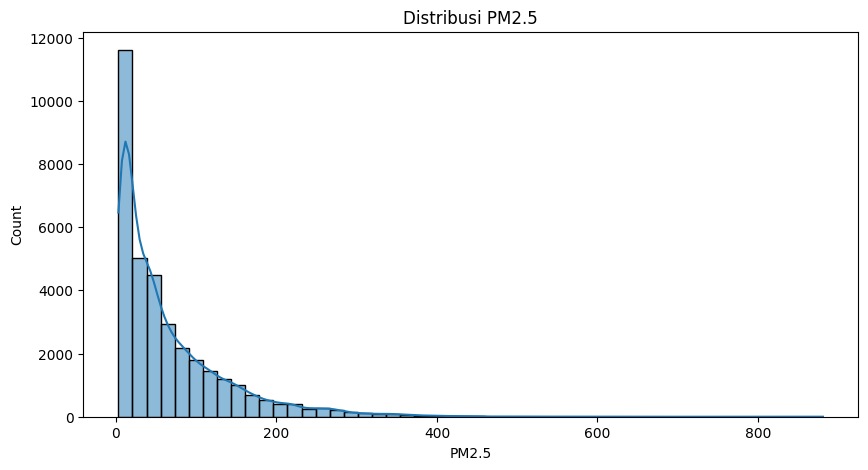

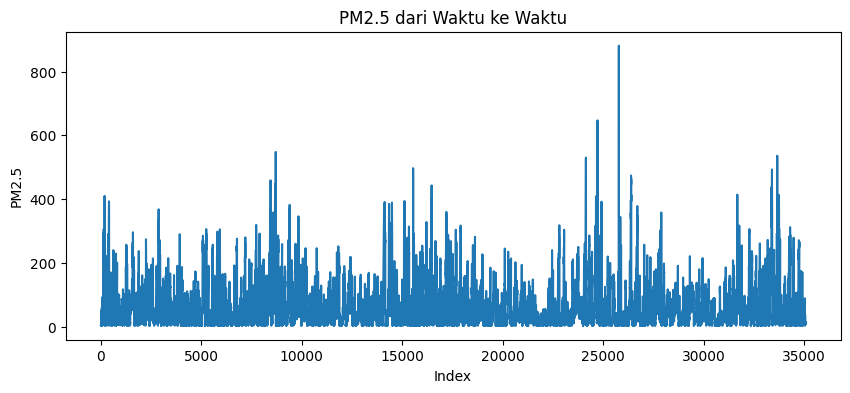

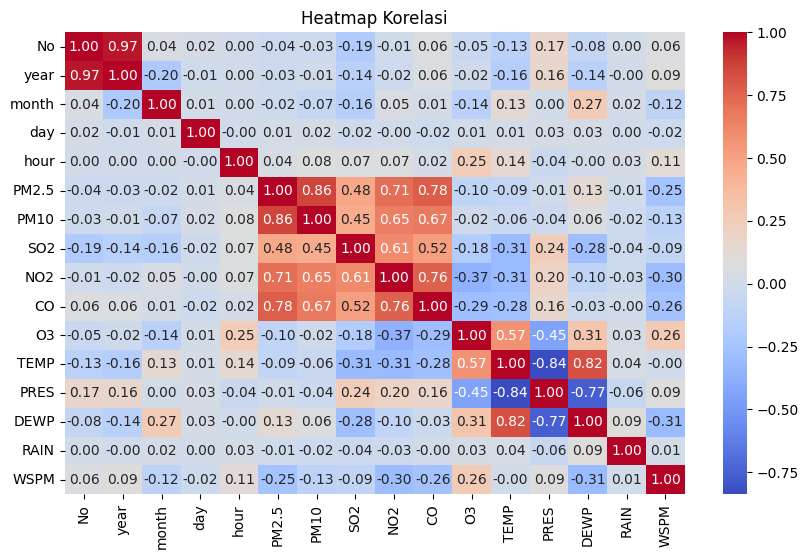

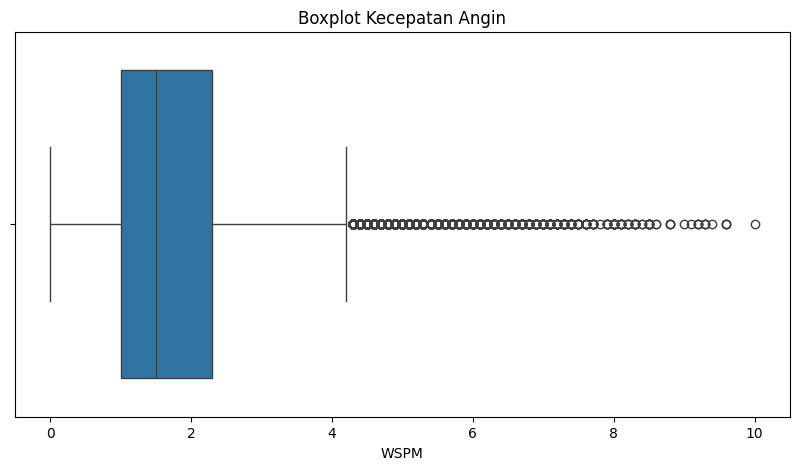

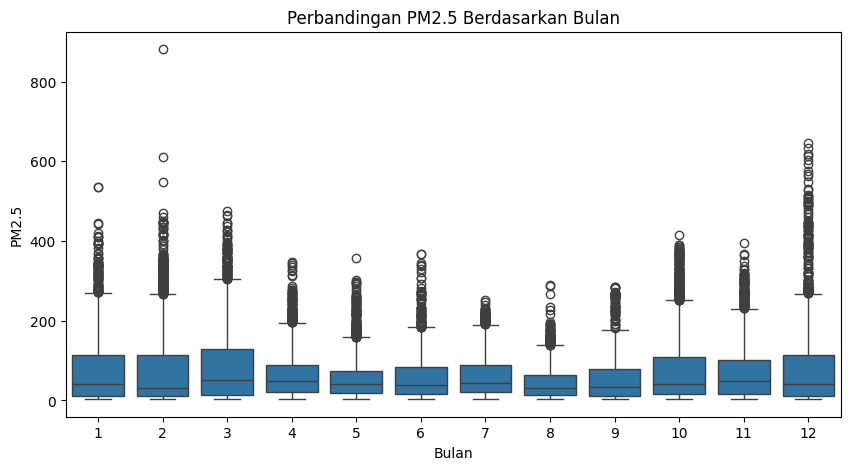

In [35]:
# Membaca dataset yang sudah dibersihkan
dingling_df = pd.read_csv("cleaned_data.csv")

print("\n------------------------")
print("Info Dataset Umum:")
print("------------------------")
print(dingling_df.info())
print("\nFirst 5 rows:\n", dingling_df.head())


# histplot distribusi polutan
plt.figure(figsize=(10, 5))
sns.histplot(dingling_df['PM2.5'], bins=50, kde=True)
plt.title('Distribusi PM2.5')
plt.show()

# Lineplot PM2.5 dari waktu ke waktu
plt.figure(figsize=(10, 4))
sns.lineplot(x=dingling_df.index, y=dingling_df['PM2.5'])
plt.title('PM2.5 dari Waktu ke Waktu')
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.show()

# mencari korelasi data data dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dingling_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

# boxplot kecepatan angin
plt.figure(figsize=(10, 5))
sns.boxplot(x=dingling_df['WSPM'])
plt.title('Boxplot Kecepatan Angin')
plt.show()

# Membandingkan polutan berdasarkan bulan dengan boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=dingling_df['month'], y=dingling_df['PM2.5'])
plt.title('Perbandingan PM2.5 Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('PM2.5')
plt.show()


**Insight:**  
- Saya menampilkan **informasi umum dataset** menggunakan `.info()` dan melihat **5 data pertama** dengan `.head()`.  
- Saya membuat **histogram distribusi PM2.5** untuk melihat sebaran data, dan tampak bahwa nilainya memiliki variasi yang cukup besar.  
- Saya menggunakan **line plot** untuk melihat tren **PM2.5 dari waktu ke waktu**, yang menunjukkan bagaimana polutan ini berubah seiring waktu.  
- Saya membuat **heatmap korelasi** untuk melihat hubungan antar variabel, di mana warna menunjukkan seberapa kuat hubungan antar data.  
- Saya menggunakan **boxplot kecepatan angin (WSPM)** untuk melihat distribusi dan outlier pada kecepatan angin.  
- Saya juga membuat **boxplot PM2.5 berdasarkan bulan** untuk melihat bagaimana polutan ini bervariasi setiap bulan, yang dapat memberikan gambaran pola musiman polusi udara.

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Apakah hubungan antara `TEMP` (suhu udara), `PRES` (tekanan atmosfer), dan `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3` (tingkat polusi) ?

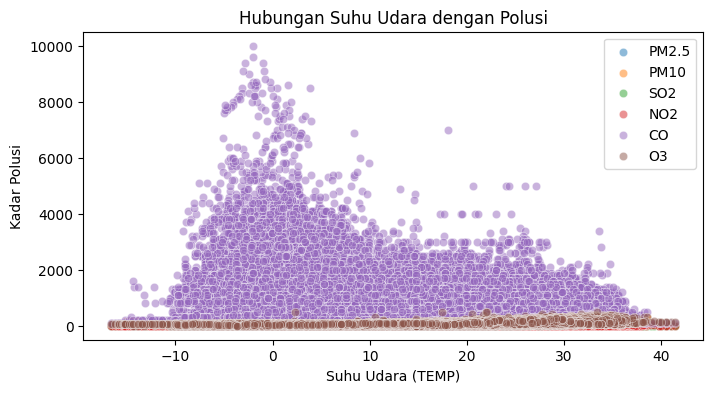

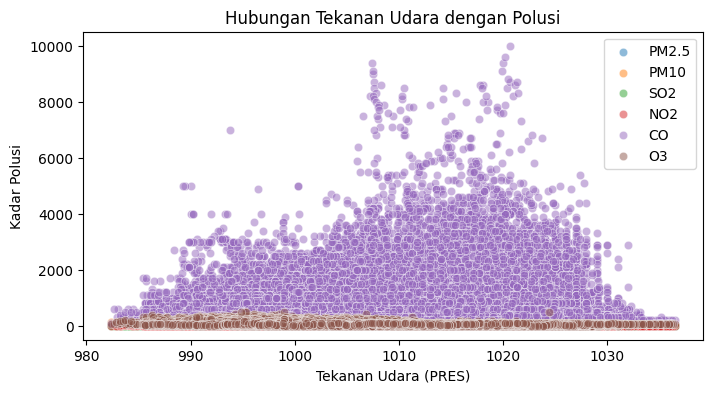

In [ ]:
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

plt.figure(figsize=(8, 4))
for pollutant in pollutants:
    sns.scatterplot(x=dingling_df["TEMP"], y=dingling_df[pollutant], label=pollutant, alpha=0.5)
plt.xlabel("Suhu Udara (TEMP)")
plt.ylabel("Kadar Polusi")
plt.title("Hubungan Suhu Udara dengan Polusi")
plt.legend()
plt.show()

# ==========================
# Scatter Plot hubungan PRES dengan tingkat polusi
# ==========================

plt.figure(figsize=(8, 4))
for pollutant in pollutants:
    sns.scatterplot(x=dingling_df["PRES"], y=dingling_df[pollutant], label=pollutant, alpha=0.5)
plt.xlabel("Tekanan Udara (PRES)")
plt.ylabel("Kadar Polusi")
plt.title("Hubungan Tekanan Udara dengan Polusi")
plt.legend()
plt.show()


**Insight:**  
- Saya membuat scatter plot untuk melihat hubungan suhu udara (`TEMP`) dengan tingkat polusi. Visualisasi ini membantu memahami apakah suhu yang lebih tinggi atau lebih rendah berpengaruh terhadap kadar polutan seperti `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `O3`.  
- Scatter plot kedua menunjukkan hubungan tekanan udara (`PRES`) dengan tingkat polusi. Dari grafik ini, saya bisa melihat apakah tekanan udara yang lebih tinggi atau lebih rendah memengaruhi konsentrasi polutan di Stasiun Dingling.

### Pertanyaan 2 : Bagaimana dampak `rain` (curah hujan) terhadap tingkat polusi udara di Stasiun Dingling?


 Rata-rata tingkat polusi saat hujan vs tidak hujan:
                  PM2.5       PM10        SO2        NO2          CO         O3
Rain_Status                                                                   
Hujan        53.974074  57.497556   4.936039  22.564172  924.584444  59.708284
Tidak Hujan  65.893216  84.328608  11.876337  27.472288  885.911965  68.630544


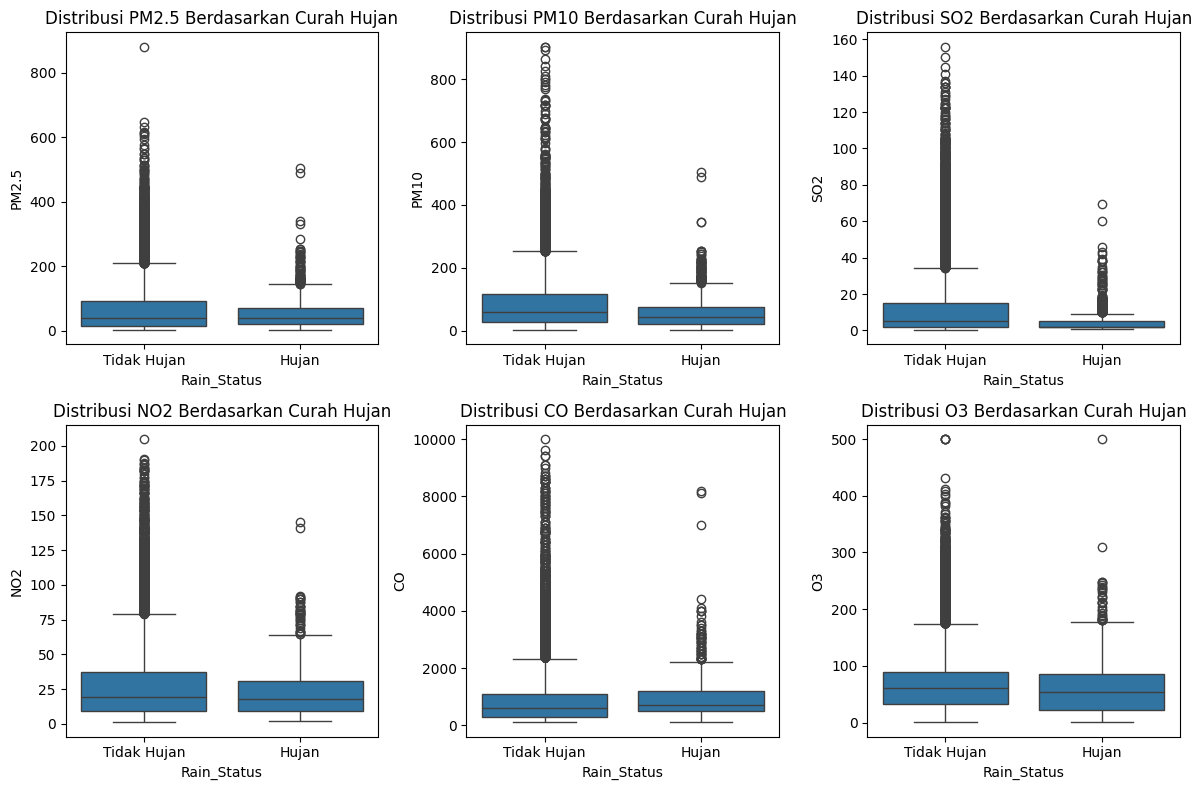

In [ ]:
# Menentukan polutan yang akan dianalisis
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

# Membuat kolom kategori: 'Hujan' atau 'Tidak Hujan'
dingling_df["Rain_Status"] = dingling_df["RAIN"].apply(lambda x: "Hujan" if x > 0 else "Tidak Hujan")

# Menghitung rata-rata polusi berdasarkan kondisi hujan
rain_pollution_avg = dingling_df.groupby("Rain_Status")[pollutants].mean()
print("\nRata-rata tingkat polusi saat hujan vs tidak hujan:\n", rain_pollution_avg)

# Membuat boxplot untuk membandingkan distribusi polusi saat hujan vs tidak hujan
plt.figure(figsize=(12, 8))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="Rain_Status", y=pollutant, data=dingling_df)
    plt.title(f"Distribusi {pollutant} Berdasarkan Curah Hujan")

plt.tight_layout()
plt.show()

**Insight:**  
- Saya membagi data menjadi dua kategori, yaitu "Hujan" dan "Tidak Hujan", berdasarkan nilai `RAIN`. Ini membantu saya memahami bagaimana curah hujan memengaruhi tingkat polusi udara.  
- Saya menghitung rata-rata kadar polusi untuk masing-masing kondisi dan membuat boxplot untuk membandingkan distribusinya. Dari visualisasi ini, saya bisa melihat apakah hujan membantu mengurangi polutan seperti `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `O3` atau justru tidak berpengaruh signifikan.

### Pertanyaan 3 : Bagaimana variasi tingkat polusi udara berdasarkan jam dalam sehari?

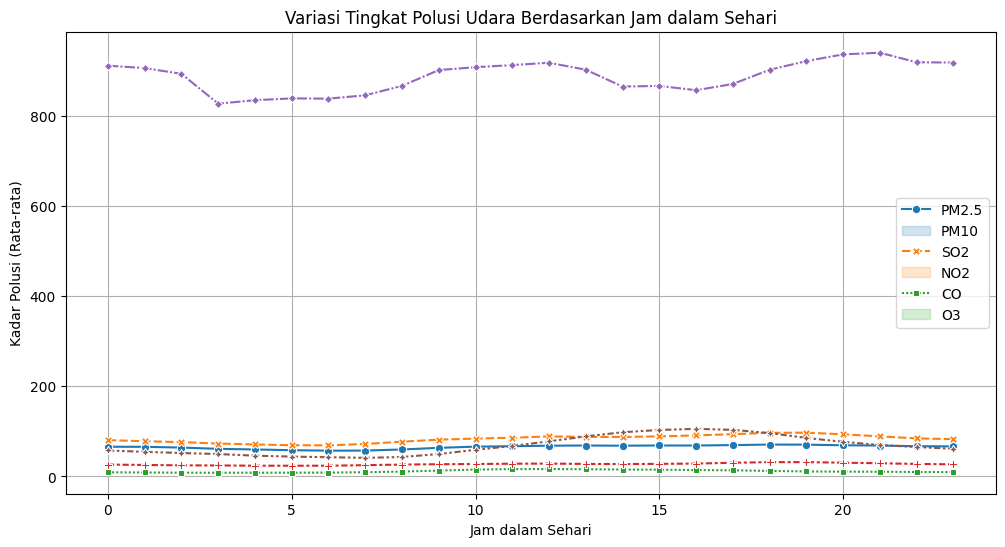

In [34]:
# Pilih hanya data dari stasiun Dingling
df_dingling = df_dingling[df_dingling["station"] == "Dingling"]

# Hitung rata-rata polusi berdasarkan jam dalam sehari
hourly_avg = df_dingling.groupby("hour")[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].mean()

# Plot variasi tingkat polusi berdasarkan jam dalam sehari
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_avg, markers=True)
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Kadar Polusi (Rata-rata)")
plt.title("Variasi Tingkat Polusi Udara Berdasarkan Jam dalam Sehari")
plt.legend(labels=["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"])
plt.grid()
plt.show()


**Insight:** 

Saya menganalisis bagaimana tingkat polusi udara berubah sepanjang hari di Stasiun Dingling dengan menghitung rata-rata kadar polutan setiap jam. Visualisasi menggunakan line plot membantu melihat pola harian polusi, seperti jam-jam dengan tingkat polusi tertinggi dan terendah.

## Conclusion

- **Conclusion pertanyaan 1**

terlihat bahwa tingkat polusi udara (seperti PM2.5, PM10, SO2, NO2, CO, dan O3) cenderung lebih tinggi saat suhu udara rendah. Ketika suhu meningkat, kadar polutan ini perlahan menurun. Hal ini kemungkinan terjadi karena udara yang lebih dingin membuat polusi lebih sulit menyebar, sementara suhu yang lebih hangat membantu sirkulasi udara, sehingga polutan lebih cepat hilang dari atmosfer.

Selain itu, hubungan antara tekanan udara dan polusi menunjukkan bahwa polusi paling tinggi terjadi ketika tekanan atmosfer berada di sekitar 1010 hPa. Pada tekanan yang lebih rendah atau lebih tinggi dari angka ini, tingkat polusi cenderung menurun. Ini bisa terjadi karena kondisi atmosfer yang berubah-ubah mempengaruhi bagaimana udara bergerak dan menyebarkan polutan. Kesimpulannya, suhu dan tekanan udara berperan penting dalam menentukan seberapa tinggi tingkat polusi di udara.

- **Conclusion pertanyaan 2**

terlihat bahwa tingkat polusi udara (PM2.5, PM10, SO2, NO2, CO, dan O3) cenderung lebih tinggi saat tidak ada hujan dibandingkan saat hujan. Hal ini ditunjukkan oleh nilai median dan distribusi data yang lebih tinggi pada kategori "Tidak Hujan". Selain itu, terdapat banyak outlier, terutama untuk PM2.5, PM10, dan NO2, yang menunjukkan bahwa dalam beberapa kondisi tertentu, kadar polusi bisa sangat tinggi meskipun ada atau tidak adanya hujan. Secara keseluruhan, hasil ini mengindikasikan bahwa hujan berperan dalam mengurangi tingkat polusi udara, kemungkinan dengan cara mengendapkan partikel-partikel polutan ke permukaan tanah.

- **Conclusion pertanyaan 3**

tingkat polusi udara di Stasiun Dingling bervariasi sepanjang hari. Polutan seperti PM2.5, PM10, SO2, NO2, CO, dan O3 cenderung lebih tinggi pada dini hari dan mulai menurun menjelang pagi. Kemudian, kadar polusi kembali meningkat pada siang hingga sore hari sebelum sedikit menurun di malam hari. Polutan PM10 memiliki nilai yang paling tinggi dibandingkan yang lain, sedangkan O3 menunjukkan pola fluktuatif sepanjang hari. Hal ini kemungkinan dipengaruhi oleh aktivitas manusia, perubahan suhu, dan kondisi atmosfer.